In [94]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

,Age,Mortality
0,50,0
1,10,0
2,82,0
...,...,...
9997,66,0
9998,52,0
9999,47,1


/Users/JakeCanfield/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


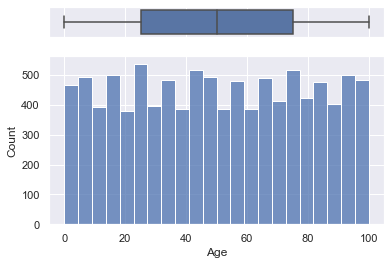

/Users/JakeCanfield/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


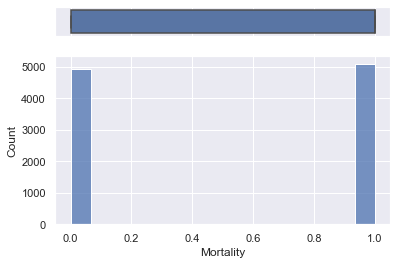

In [110]:
# Create mock data

mortality = np.random.randint(2, size=10000) # generate mortality data

age = np.random.randint(101, size=10000) # generate age data

# Combine data frames together

data = np.vstack([age, mortality]).T
data = pd.DataFrame(data, columns=['Age', 'Mortality'])

# Display data sample 

pd.set_option('display.max_rows', 6)
display(data)

# Show distributions of each data category

sns.set_theme(style="darkgrid") # Set color theme
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data["Age"], orient="h", ax=ax_box)
sns.histplot(data=data["Age"], ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

sns.set_theme(style="darkgrid") # Set color theme
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data["Mortality"], orient="h", ax=ax_box)
sns.histplot(data=data["Mortality"], ax=ax_hist)
ax_box.set(xlabel='')
plt.show()



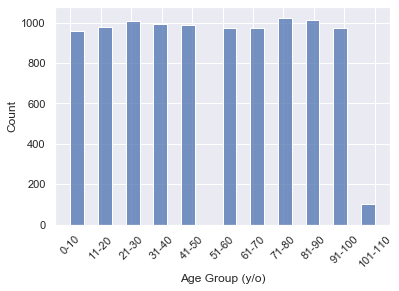

In [111]:
# Bin the data by age in 10 year chunks

age_list = list(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100','101-110'])
bins = np.linspace(0,100,11)
binned_data = np.digitize(x=data['Age'], bins=bins) # returns list of int for each bin
data['Bins'] = binned_data
data = data.sort_values(by=['Age'])
avg_mortality_all = np.mean(data['Mortality'])
std_mortality_all = np.std(data['Mortality'])

mortality_df = pd.DataFrame(columns=['Bin', 'Average Mortality'])

for i in np.unique(binned_data):
    df = data.loc[data['Bins'] == i]
    avg_mortality = np.mean(df['Mortality'])
    df2 = pd.DataFrame([[i, avg_mortality]], columns = ['Bin', 'Average Mortality'])
    mortality_df = mortality_df.append(df2)
mortality_df['Age Range (y/o)'] = age_list

g = sns.histplot(data=data["Bins"])
g.set_xticks(range(1,12))
g.set_xticklabels(age_list)
plt.xticks(rotation=45)
plt.xlabel('Age Group (y/o)')
ax_box.set(xlabel='')
plt.show()

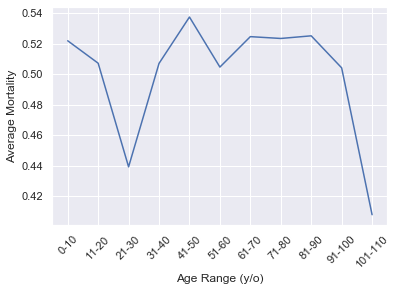

In [112]:
# Plot data as age vs mortality rate

g = sns.lineplot(data=mortality_df, x='Age Range (y/o)', y='Average Mortality')
plt.xticks(rotation=45)
plt.show()

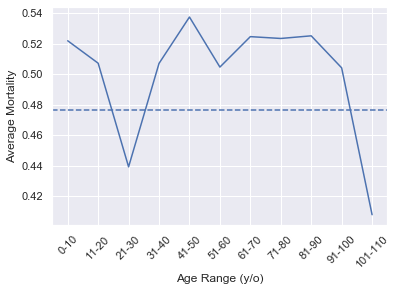

In [123]:
# Plot with threshold set at x +/- 2SD

simple_threshold = 0.8*np.mean(mortality_df['Average Mortality']) + 2*np.std(mortality_df['Average Mortality']) # using 0.8 mulitplier for average just to make threshold be below, for real scenarion this would not be the 
g = sns.lineplot(data=mortality_df, x='Age Range (y/o)', y='Average Mortality')
plt.xticks(rotation=45)
g.axhline(simple_threshold, ls='--')
plt.show()

In [ ]:
# Try logistic regression on data without binning of age

# Plot where line is drawn for logistic regression in data